In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

from mlxtend.plotting import plot_decision_regions

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

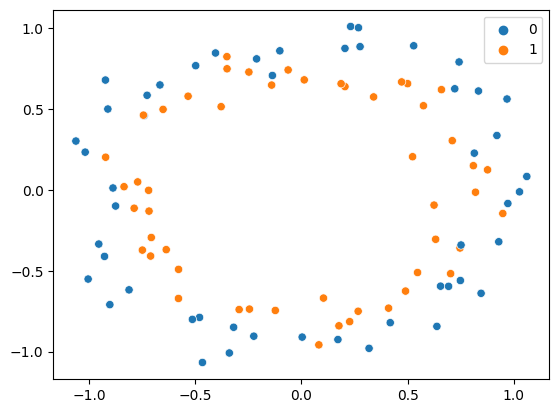

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Problem without Early Stopping:

In [5]:
# build model architecture
model = Sequential()

model.add(Dense(256, input_dim=2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, verbose=0)

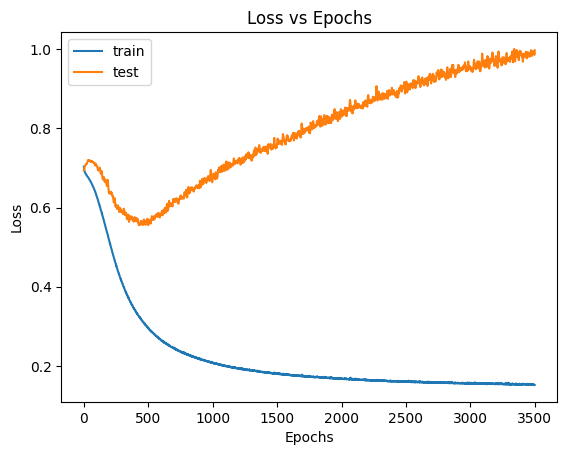

In [6]:
# display the loss over the epochs
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

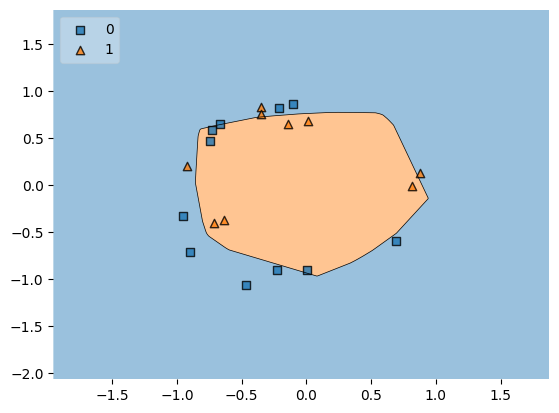

In [7]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

## Now use the Early Stopping:

In [8]:
# define the same model architecture
model = Sequential()

model.add(Dense(256, input_dim=2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# define the early stopping
# for more details: https://keras.io/api/callbacks/early_stopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 87ms/step - loss: 0.6921 - accuracy: 0.4875 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6906 - accuracy: 0.4750 - val_loss: 0.7007 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6892 - accuracy: 0.5500 - val_loss: 0.7018 - val_accuracy: 0.3000
Epoch 4/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6878 - accuracy: 0.5625 - val_loss: 0.7028 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6867 - accuracy: 0.5625 - val_loss: 0.7039 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6860 - accuracy: 0.5625 - val_loss: 0.7055 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6849 - accuracy: 0.5750 - val_loss: 0.7078 - val_accuracy: 0.4000
Epoch 8/3500


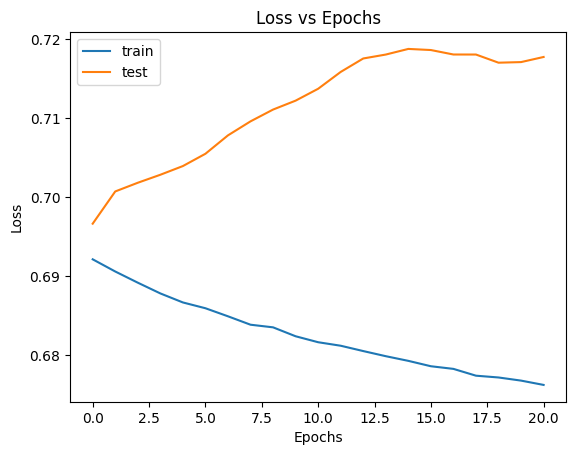

In [9]:
# display the loss over the epochs
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()